Datos de http://elecciones.santafe.gov.ar/descargas#

In [1]:
!wget http://elecciones.santafe.gov.ar/bundles/escrutinio/descargas/csv.zip

--2015-06-16 14:58:46--  http://elecciones.santafe.gov.ar/bundles/escrutinio/descargas/csv.zip
Resolving elecciones.santafe.gov.ar (elecciones.santafe.gov.ar)... 200.12.192.183
Connecting to elecciones.santafe.gov.ar (elecciones.santafe.gov.ar)|200.12.192.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 865821 (846K) [application/zip]
Saving to: ‘csv.zip’

100%[======================================>] 865.821      223KB/s   in 4,0s   

2015-06-16 14:58:50 (212 KB/s) - ‘csv.zip’ saved [865821/865821]



In [2]:
!unzip csv.zip

Archive:  csv.zip
  inflating: desestimados.csv        
  inflating: pendientes.csv          
  inflating: computados.csv          


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
computados = pd.read_csv('computados.csv')

/home/patodb/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [5]:
computados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97040 entries, 0 to 97039
Data columns (total 18 columns):
nroSeccion            97040 non-null int64
nombreSeccion         97040 non-null object
nroCircuito           97040 non-null int64
letraCircuito         26705 non-null object
nombreCircuito        97040 non-null object
nroCircuitoMadre      19720 non-null float64
letraCircuitoMadre    7155 non-null object
letraMesa             3373 non-null object
nroMesa               97040 non-null int64
nroPartido            97040 non-null object
nombrePartido         97040 non-null object
votosGob              97040 non-null int64
votosDip              97040 non-null int64
votosSen              97040 non-null int64
votosInt              97040 non-null int64
votosCon              97040 non-null int64
votosCco              97040 non-null int64
fechaIngreso          97040 non-null object
dtypes: float64(1), int64(9), object(8)
memory usage: 14.1+ MB



###  Votos promedio por seccion y partido 

Sólo aquellos que tienen más de 5 votos promedio)

In [6]:
pd.set_option('display.max_rows', 2000)
promedio_gob_seccion = pd.pivot_table(computados, index=['nroSeccion', 'nroPartido'], values=['votosGob']) 
votos_promedio_seccion = promedio_gob_seccion[promedio_gob_seccion.votosGob > 5]
votos_promedio_seccion

votosGob
nroSeccion nroPartido            
1          0004         60.518519
           0005        101.009259
           0006         71.370370
           0008          6.388889
           ANUL          5.240741
           BLAN         11.814815
2          0004         50.153488
           0005         91.911628
           0006         72.748837
           0008          9.093023
           ANUL          6.967442
           BLAN         12.627907
3          0004         90.985542
           0005         70.127711
           0006         57.987952
           0008          6.669880
           ANUL          6.067470
           BLAN          7.115663
4          0004         67.569444
           0005         74.245370
           0006         73.532407
           0008          8.648148
           ANUL          5.773148
           BLAN         11.504630
5          0004         73.037037
           0005         79.870370
           0006         52.777778
           0008          6.240741
           ANUL          5.259259
           BLAN         15.055556
6          0004         55.075107
           0005         82.152361
           0006         83.175966
           0008          7.437768
           BLAN         10.976395
7          0004         73.019608
           0005         65.223039
           0006         83.588235
           0008          7.387255
           ANUL          5.105392
           BLAN         11.526961
8          0004         59.910714
           0005         89.434524
           0006         72.172619
           0008          7.369048
           ANUL          6.732143
           BLAN         11.172619
9          0001          5.849754
           0004         80.976601
           0005         72.028325
           0006         69.038177
           0008         11.842365
           ANUL          9.296798
           BLAN          5.490148
10         0004         84.262658
           0005         81.088608
           0006         57.829114
           0008          9.231013
           ANUL          8.468354
           BLAN          6.797468
11         0004         64.423664
           0005         84.377863
           0006         68.610687
           0008          8.274809
           ANUL          5.267176
           BLAN         10.034351
12         0004         69.859155
           0005         84.183099
           0006         51.014085
           0008          7.591549
           BLAN         18.281690
13         0001          9.826156
           0004         51.103668
           0005         66.385965
           0006        101.730463
           0008         10.357257
           ANUL          6.835726
14         0001          9.798171
           0004         70.072502
           0005         63.915741
           0006         77.970607
           0008         11.160026
           ANUL         11.238406
           BLAN          6.130634
15         0001          6.252874
           0004         79.022989
           0005         76.100164
           0006         71.533662
           0008          8.522167
           ANUL          9.591133
           BLAN          8.558292
16         0004         69.158192
           0005         64.683616
           0006         75.553672
           BLAN         13.045198
17         0004         79.886076
           0005         65.759494
           0006         69.873418
           ANUL          6.177215
           BLAN         16.746835
18         0004         72.791262
           0005         79.509709
           0006         62.140777
           0008          6.577670
           ANUL          6.165049
           BLAN         11.941748
19         0004         57.773913
           0005         80.600000
           0006         61.939130
           ANUL          5.234783
           BLAN          8.991304
20         0001          5.508951
           0004         84.250639
           0005         76.074169
           0006         72.913043
           0008          7.312020
           AN

###  Mesas desestimadas y pendientes por seccion

Contamos cuantas mesas sin escrutar quedaron por sección

In [7]:
desestimados= pd.read_csv('desestimados.csv')
mesas_desestimadas_por_seccion = desestimados["nroSeccion"].value_counts()

In [8]:
pendientes = pd.read_csv('pendientes.csv')
mesas_pendientes_por_seccion = pendientes["nroseccion"].value_counts()

### Performance Partidos en Secciones con mesas Desestimadas

Filtramos por los partidos políticos más importantes:

In [9]:
computados = computados[computados.nroPartido.isin(['0004','0005','0006','ANUL','BLAN'])]

In [10]:
secciones_con_mesas_desestimadas = desestimados["nroSeccion"].unique()
computados[computados.nroSeccion.isin(secciones_con_mesas_desestimadas)].groupby('nombrePartido').votosGob.mean().order(ascending=False)

nombrePartido
FRENTE PROGRESISTA CIVICO Y SOCIAL       74.262837
UNION PRO FEDERAL                        73.118141
FRENTE JUSTICIALISTA PARA LA VICTORIA    70.905297
Votos en Blanco                           8.267443
Votos Anulados                            7.793253
Name: votosGob, dtype: float64

En promedio, en las secciones con **mesas desestimadas**, el FRENTE PROGRESISTA CIVICO Y SOCIAL tiene **1.15 votos** más que UNION PRO FEDERAL. Lo Cual, si se mantuviera la tendencia, el FRENTE PROGRESISTA CIVICO Y SOCIAL mantendría la ventaja.

### Performance Partidos en Secciones con mesas Pendientes

In [11]:
secciones_con_mesas_pendientes = pendientes["nroseccion"].unique()
computados_en_secciones_con_mesas_pendientes = computados[computados.nroSeccion.isin(secciones_con_mesas_pendientes)]
computados_en_secciones_con_mesas_pendientes.groupby('nombrePartido').votosGob.mean().order(ascending=False)

nombrePartido
FRENTE PROGRESISTA CIVICO Y SOCIAL       74.540892
UNION PRO FEDERAL                        72.365472
FRENTE JUSTICIALISTA PARA LA VICTORIA    71.884418
Votos en Blanco                           8.015801
Votos Anulados                            7.926116
Name: votosGob, dtype: float64

En promedio, en las secciones con mesas **pendientes**, el FRENTE PROGRESISTA CIVICO Y SOCIAL tiene **2.18 votos** más que UNION PRO FEDERAL. Lo Cual, si se mantuviera la tendencia, el FRENTE PROGRESISTA CIVICO Y SOCIAL mantendría la ventaja.

### Proyección

Multiplicamos la cantidad de mesas no escrutadas por los votos promedios por mesa de cada partido en cada seccion

In [12]:
def por_seccion(prom, sec):
    mesas = 0
    if sec in mesas_pendientes_por_seccion:
        mesas += mesas_pendientes_por_seccion[sec]
    if sec in mesas_desestimadas_por_seccion:
        mesas += mesas_desestimadas_por_seccion[sec]
    return int(prom)*mesas


In [13]:
fpcys = 0
pro = 0
fpv = 0

for row in votos_promedio_seccion.iterrows():
    if row[0][1] == "0004":
        fpv += por_seccion(row[1], row[0][0])
    elif  row[0][1] == "0005":
        pro += por_seccion(row[1], row[0][0])
    elif row[0][1] == "0006":
        fpcys += por_seccion(row[1], row[0][0])
        
print "FPV: %d Votos" % (fpv  + 532156)
print "PRO: %d Votos" % (pro + 556224)
print "FPCYS: %d Votos" % (fpcys + 558352)

FPV: 558740 Votos
PRO: 582576 Votos
FPCYS: 585198 Votos


Segun nuestra proyección gana el socialismo por más de 2000 votos.


### Analisis Fecha de Ingreso por Partido

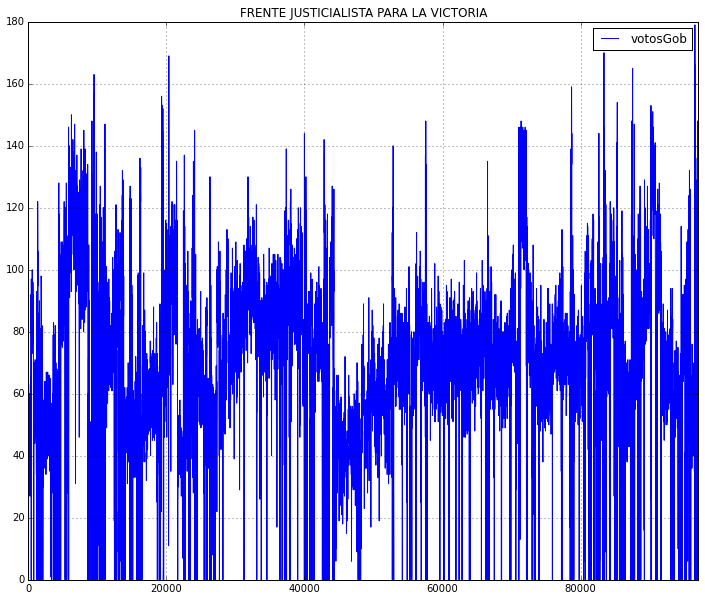

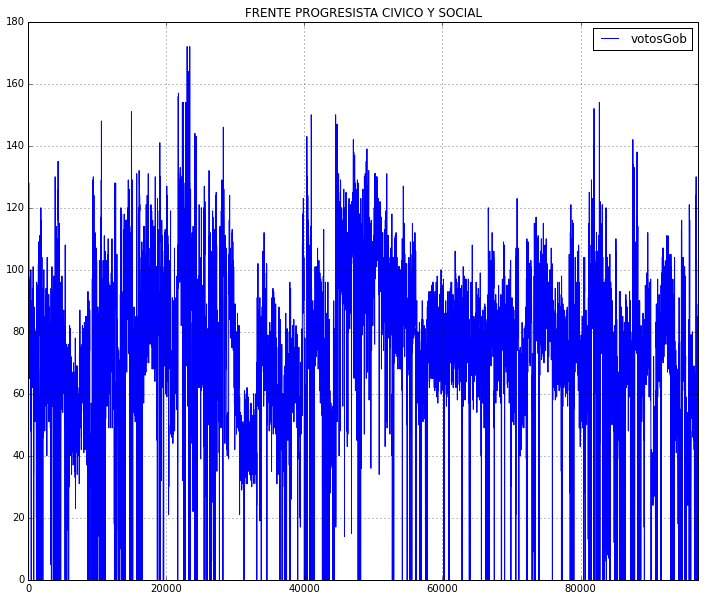

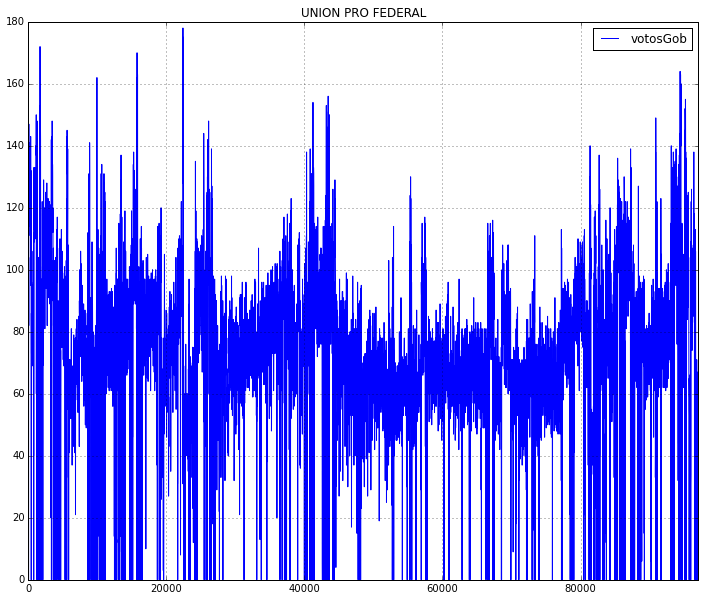

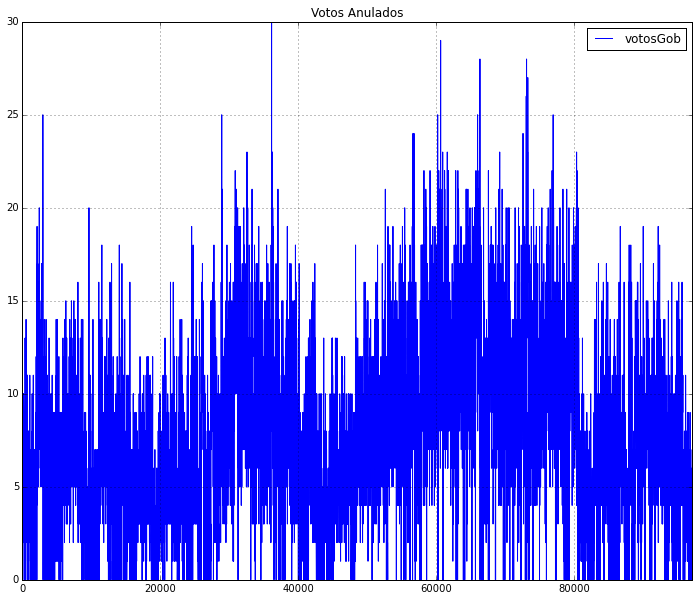

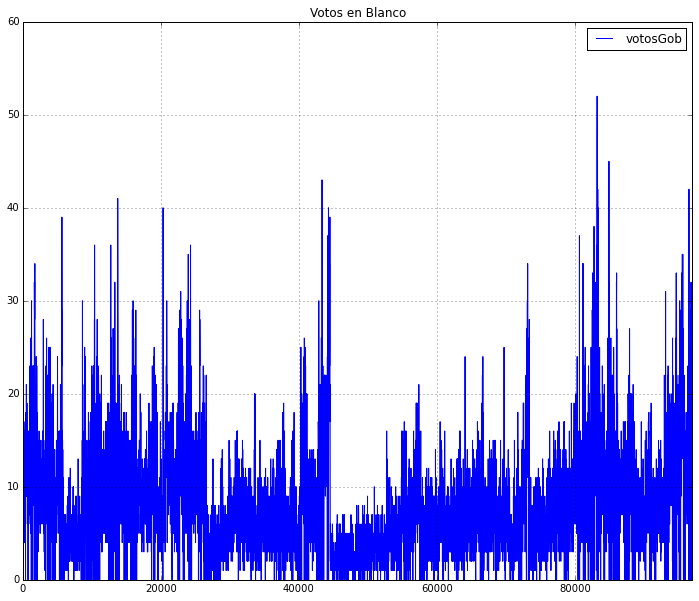

In [25]:

for key, group in computados[['votosGob','nombrePartido','fechaIngreso']].groupby('nombrePartido'):
    plt.figure()
    group.plot(title=key, label=key, figsize=(12,10))